In [3]:
import time
import numpy as np
import pandas as pd

from SA.simulatedAnnealing import simulatedAnnealing
from problems.TSP.SimulatedAnnelingOperationsTSP import SimulatedAnnelingOperationsTSP as TSP

from utils.calculations import Point
from utils.manipulationFile import read_txt_file
import utils.cooling as alpha
from utils.graphics import create_plot, create_box_plots

from scripts.tsp import experiment, experiment_one_SA



ModuleNotFoundError: No module named 'utils'

In [10]:
PATH: str = "samples/eil100.txt"
problem: str = "TSP100"

## Teste para o Grafo com 51 cidades

+ N = 250_000
+ Número de Cidades Criada por criação de vizinho: 1, 3, 5
+ Equações Testadas: 5, 8, 9
+ TN = 0.01
+ SA_Max: 1, 5, 10

In [3]:
# df = experiment(
#     problem=problem,
#     path=PATH,
#     num_interation=10,
#     num_neighbors_mod_list=[1],
#     num_neighbors=500,
#     SA_max_list=[1, 5, 10],
#     eq_list=[9],
#     TN=0.01,
#     N=100_000,
#     t=False
# )


# Teste para o Grafico com 100 cidades

+ N = 250_000
+ Número de Cidades Criada por criação de vizinho: 1
+ Equações Testadas: 1, 7, 9
+ TN = 0.01
+ SA_Max: 1, 5, 10

In [15]:
df = experiment(
    problem=problem,
    path=PATH,
    num_interation=10,
    num_neighbors_mod_list=[1],
    num_neighbors=500,
    SA_max_list=[1, 5, 10],
    eq_list=[9],
    TN=0.01,
    N=250_000,
    t=False
)


Loading:   0%|          | 0/3 [00:00<?, ?it/s]

8215.996720362338


Loading:  33%|███▎      | 1/3 [03:58<07:57, 238.64s/it]

num_elements: 100
distance: 28086.574494489592
elements: [54, 82, 28, 99, 70, 40, 42, 11, 26, 34, 85, 86, 92, 27, 0, 62, 71, 20, 73, 58, 16, 14, 10, 31, 44, 76, 56, 8, 6, 33, 45, 2, 13, 47, 29, 84, 67, 24, 80, 68, 72, 49, 43, 63, 39, 53, 1, 81, 94, 12, 75, 32, 36, 4, 51, 77, 95, 38, 50, 60, 57, 66, 74, 87, 15, 93, 21, 69, 65, 25, 64, 3, 18, 89, 9, 83, 35, 98, 37, 23, 17, 78, 52, 96, 55, 79, 30, 88, 41, 7, 91, 48, 5, 46, 90, 97, 22, 59, 61, 19]

7079.68455404829


Loading:  67%|██████▋   | 2/3 [23:52<13:20, 800.31s/it]

num_elements: 100
distance: 27705.870440887924
elements: [15, 69, 65, 25, 64, 3, 96, 55, 74, 5, 62, 0, 92, 57, 60, 80, 24, 50, 86, 8, 6, 56, 22, 31, 10, 58, 35, 98, 37, 23, 17, 93, 21, 87, 78, 83, 9, 71, 20, 73, 46, 27, 66, 68, 72, 81, 94, 12, 75, 32, 36, 4, 51, 77, 95, 38, 29, 28, 45, 13, 47, 99, 70, 40, 2, 42, 19, 76, 97, 90, 16, 14, 44, 59, 61, 34, 85, 26, 11, 54, 82, 33, 84, 67, 49, 43, 1, 63, 39, 53, 88, 30, 79, 41, 7, 91, 48, 89, 18, 52]

7941.775883648486


Loading: 100%|██████████| 3/3 [1:03:26<00:00, 1268.96s/it]

num_elements: 100
distance: 23529.36504788375
elements: [25, 64, 3, 96, 55, 79, 30, 88, 41, 7, 91, 46, 31, 10, 14, 16, 58, 73, 20, 71, 35, 98, 37, 23, 17, 78, 83, 9, 89, 48, 5, 62, 0, 92, 27, 57, 60, 24, 80, 67, 84, 49, 43, 72, 68, 63, 39, 53, 1, 81, 94, 12, 75, 32, 36, 4, 51, 77, 95, 38, 29, 47, 99, 40, 70, 13, 2, 42, 45, 28, 33, 82, 54, 11, 26, 85, 34, 59, 44, 90, 97, 22, 76, 61, 19, 56, 6, 8, 86, 50, 66, 74, 18, 52, 87, 15, 93, 21, 69, 65]



In [16]:
df 

,Problema,SA_max,Equação,Número de Vizinhos,Número de Interações,Temperatura Inicial,Melhor Solução,Média,Desvio Padrão,Tempo (s),Imagem
0,TSP100,1,9,1,250000,8215.996720,28086.574494,32209.913225,1931.993109,238.641644,con-PTSP100-SA1-EQ9-N250000-174600067140904556...
1,TSP100,5,9,1,250000,7079.684554,25131.613848,27588.446899,1966.675338,1193.475840,con-PTSP100-SA5-EQ9-N250000-174600186483124439...
2,TSP100,10,9,1,250000,7941.775884,23529.365048,25462.226676,1069.434021,2374.642808,con-PTSP100-SA10-EQ9-N250000-17460042394891683...


In [6]:
id = df["Melhor Solução"].idxmin()

id

2

In [16]:
df_media = df[["SA_max", "Equação", "Número de Vizinhos", "Melhor Solução", "Média", "Desvio Padrão" ]].sort_values(["SA_max"])
df_media

,SA_max,Equação,Número de Vizinhos,Melhor Solução,Média,Desvio Padrão
0,1,9,1,26613.589834,30762.265585,2784.354045
1,5,9,1,24159.987833,25538.975214,1461.135598
2,10,9,1,24396.027908,25845.430204,1006.608982


9824.356788322068


Loading: 100%|██████████| 500000/500000 [11:06<00:00, 750.72it/s]


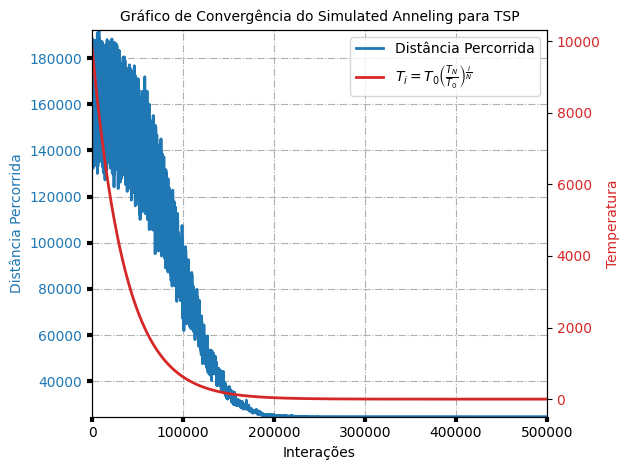

num_elements: 100
distance: 24679.13367295868
elements: [38, 47, 99, 40, 70, 13, 2, 42, 45, 28, 29, 95, 77, 51, 4, 36, 32, 75, 12, 94, 81, 49, 72, 43, 1, 53, 39, 63, 68, 60, 50, 86, 56, 8, 6, 33, 82, 54, 11, 19, 26, 85, 34, 61, 59, 76, 57, 92, 27, 7, 91, 0, 46, 90, 97, 22, 44, 31, 62, 5, 48, 3, 64, 25, 65, 69, 21, 15, 87, 93, 17, 23, 37, 98, 35, 58, 16, 14, 10, 73, 20, 71, 83, 9, 89, 78, 52, 18, 74, 96, 55, 79, 30, 88, 41, 66, 24, 80, 67, 84]



24679.13367295868

In [ ]:
# res = experiment_one_SA(
#     problem="TSP100",
#     path="samples/eil100.txt",
#     num_interation=1,
#     num_neighbors_mod=1,
#     num_neighbors=500,
#     SA_max=10,
#     eq=1,
#     TN=0.01,
#     N=500_000,
#     t=0,
#     show=True,
#     bar=True
# )

# ponto ótimo 426 e 21282

# res[6]

In [9]:
# 1, 7, 9
# 500_000

# 5 - 250 mil - 0.01 - 26975.790188923533
# 5 - 250 mil - 0.001 - 27445.463211666
# 5 - 500 mil - 0.01 -  28014.50793363138
# 8 - 250 mil - 0.01 - 26037.439728639605
# 9 - 250 mil - 0.01 - 29519.1201606241
# 1 - 250 mil - 0.01 - 24959.676882024232
# 1 - 500 mil - 0.01 - 24937.98129793638
# 2 - 250 mil - 0.01 - 40098.787619479364
# 2 - 250 mil - 0.01 - 28972.254017006708
# 3 - 500 mil - 0.01 - 24800.511536552847
# 3 - 750 mil - 0.01 - 26029.070807291107
# 6 - 250 mil - 0.01 - 24667.184337699124
# 6 - 500 mil - 0.01 - 24871.197352076117
# 7 - 250 mil - 0.01 - 23231.77226248191
# 7 - 500 mil - 0.01 - 21724.412026582584
# 8 - 250 mil - 0.01 - 26516.417898300086
# 9 - 250 mil - 0.01 - 24346.15246539464
# 9 - 500 mil - 0.01 -  23330.304046908404


In [17]:
df_1 = pd.read_csv("logs/result-TSP100-1745983588750105933.csv")
df_2 = pd.read_csv("logs/result-TSP100-1746000343668899951.csv")
df_3 = pd.read_csv("logs/result-TSP100-1746004240208116648.csv")

df_51 = pd.concat([df_1, df_2, df_3])
df_51[["SA_max", "Equação", "Melhor Solução", "Média", "Desvio Padrão", "Tempo (s)" ]].sort_values(["SA_max"]).to_csv("logs/table100.csv")

In [3]:
df_51["Melhor Solução"].min()

np.float64(440.7753581916181)